Learned kernel RBF(length_scale=0.86)


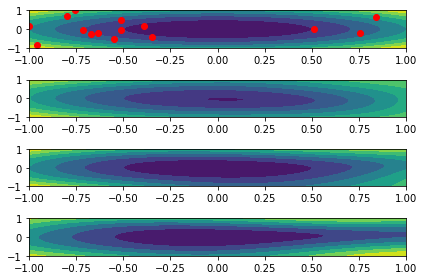

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import scipy.stats as st

np.random.seed(1)

# Quadratic 2d potential
def func(x):
    return np.sum(x**2, axis=-1)


# Grid
lim = 1
res = 50
lin = np.linspace(-lim, lim, res)

# x1.shape = (50, 50)
x1, x2 = np.meshgrid(lin, lin)
# xx.shape = (2500, 2)
xx = np.vstack((x1.flatten(), x2.flatten())).T

# Analytic function values
y_analytic = func(xx)
y_analytic = y_analytic.reshape(-1, res)

# Observed data
obs = 15
# X.shape = (15, 2)
X = np.stack(
        (np.random.choice(lin, obs), np.random.choice(lin, obs)),
        axis=-1
)
y_obs = func(X)

kernel = RBF()
gp = GaussianProcessRegressor(kernel=kernel,
                              n_restarts_optimizer=10)
gp.fit(X, y_obs)
print("Learned kernel", gp.kernel_)
# y_mean.shape = (2500, )
# y_cov.shape = (2500, 2500)
y_mean, y_cov = gp.predict(xx, return_cov=True)

posterior_nums = 3
posteriors = st.multivariate_normal.rvs(mean=y_mean, cov=y_cov,
                                        size=posterior_nums)

fig, axs = plt.subplots(posterior_nums+1)

ax = axs[0]
ax.contourf(x1, x2, y_analytic)
ax.plot(X[:, 0], X[:, 1], "r.", ms=12)

for i, post in enumerate(posteriors, 1):
    axs[i].contourf(x1, x2, post.reshape(-1, res))

plt.tight_layout()
plt.show()